# ITS307 Data Analytics : Autumn Semester 2022

# Lecture 3

# Data Wrangling with pandas


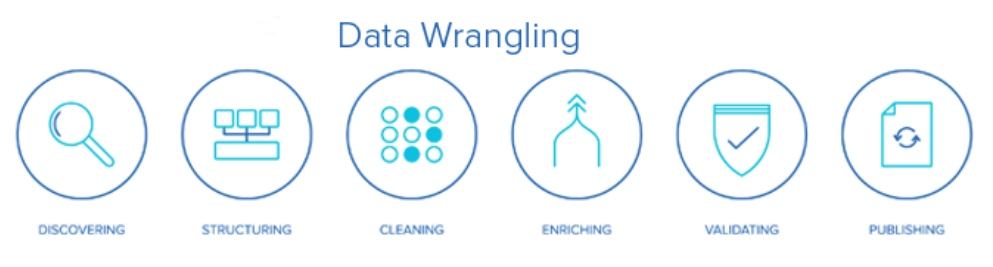

# 1. Duplicated data

## <font color="green">1.1 Check Duplicates records

`DataFrame.duplicated(subset=None, keep='first')`

In [3]:
#load data and check if your data contain any duplicates

import pandas as pd

df = pd.read_excel("yelp.xlsx")
df 


C:\Users\Tandin Jamtsho\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


name      category_0  \
0                         China Sea Chinese Restaurant     Restaurants   
1                                 Discount Tire Center           Tires   
2                                         Frankfurters     Restaurants   
3                                    Fred Dietz Floral        Shopping   
4                                        Kuhn's Market            Food   
..                                                 ...             ...   
595  Republic Services of Southern Nevada Recycling...  Local Services   
596                                       SA Recycling  Local Services   
597                                    Jack In the Box     Restaurants   
598                               Custom Hearth & Door        Shopping   
599                                   A Sunrise Towing      Automotive   

                          category_1  take_out  review_count  stars  city_id  \
0                            Chinese      True          11.0    2.5        1   
1                         Automotive     False          24.0    4.5        1   
2                           Hot Dogs      True           3.0    4.5        1   
3                    Flowers & Gifts     False           6.0    4.0        1   
4                            Grocery     False           8.0    3.5        1   
..                               ...       ...           ...    ...      ...   
595                 Recycling Center     False           7.0    2.5       13   
596                 Recycling Center     False           3.0    1.5       13   
597                        Fast Food      True          12.0    3.0       13   
598  Heating & Air Conditioning/HVAC     False           9.0    4.0       13   
599                           Towing     False           4.0    1.0       13   

     state_id  
0           1  
1           1  
2           1  
3           1  
4           1  
..        ...  
595         2  
596         2  
597         2  
598         2  
599         2  

[600 rows x 8 columns]

In [4]:
#check if your data contain any duplicates

df.duplicated().sum()

0

In [5]:
#Use subset parameters to check if there is any duplicate business name

df.duplicated(subset=['name', 'take_out', 'stars']).sum()


8

## <font color="green">1.2. Drup Duplicates
    
`DataFrame.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)`

In [6]:
# use drop_duplicates() method to drop all duplicate business names

df.drop_duplicates(subset=['name'], inplace=True)
df.shape

(566, 8)

# 2. Missing Values

##  <font color=green>2.1. Check Missing values
    
`DataFrame.isna()` or `DataFrame.isnull()` Detect missing values.
    
    
Return a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy.NaN, gets mapped to True values. Everything else gets mapped to False values. Characters such as empty strings '' or numpy.inf are not considered NA values

In [7]:
# Use isna() and isnull() method to check null values in dataframe

df.isna().sum()


name            0
category_0      0
category_1      0
take_out        0
review_count    3
stars           2
city_id         0
state_id        0
dtype: int64

#### <font color=red> Question 1: Which columns contains missing values? Mention how many record are missing in each columns.

In [8]:
## Write your answer here

df.isnull().sum()


name            0
category_0      0
category_1      0
take_out        0
review_count    3
stars           2
city_id         0
state_id        0
dtype: int64

## <font color=green>2.2. Handle Missing Values
    
- Remove Missing values if your number of records with missing values are less.
    
    
- Source Missing information manually.
    
    
- Imputation - imputation is the process of replacing missing data with substituted values. 
    
    `Note: Use either pandas or sklearn to perform imputation`

### <font color=blue>2.2.1. Using pandas for Imputation
    
`DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None)`

In [9]:
# Use fillna() method to fill null values with 0. 

fdf=df.fillna(0) 
fdf.isna().sum() 

name            0
category_0      0
category_1      0
take_out        0
review_count    0
stars           0
city_id         0
state_id        0
dtype: int64

In [10]:
#Check if you have any more null values

bdf =df.ffill()
bdf.isna().sum()



name            0
category_0      0
category_1      0
take_out        0
review_count    0
stars           0
city_id         0
state_id        0
dtype: int64

`DataFrame.ffill(axis=None, inplace=False, limit=None, downcast=None)` - Synonym for DataFrame.fillna() with method='ffill

`DataFrame.bfill(axis=None, inplace=False, limit=None, downcast=None)` - Synonym for DataFrame.fillna() with method='bfill

### <font color = blue>2.2.2. Using sklearn for Imputation
    
`class sklearn.impute.SimpleImputer(*, missing_values=nan, strategy='mean', fill_value=None, verbose='deprecated', copy=True, add_indicator=False)`

`DataFrame.select_dtypes(include=None, exclude=None)`

In [11]:
# check data types

df.dtypes


name             object
category_0       object
category_1       object
take_out           bool
review_count    float64
stars           float64
city_id           int64
state_id          int64
dtype: object

In [30]:
ndf = df.select_dtypes(include=['float64', 'int64']) 
ndf

review_count  stars  city_id  state_id
0            11.0    2.5        1         1
1            24.0    4.5        1         1
2             3.0    4.5        1         1
3             6.0    4.0        1         1
4             8.0    3.5        1         1
..            ...    ...      ...       ...
594           6.0    4.5       13         2
595           7.0    2.5       13         2
596           3.0    1.5       13         2
598           9.0    4.0       13         2
599           4.0    1.0       13         2

[566 rows x 4 columns]

In [31]:
#Use simpleImputer to impute missing values

from sklearn.impute import SimpleImputer
imputeN = SimpleImputer()

ndata = imputeN.fit_transform(ndf)
ndata

array([[11. ,  2.5,  1. ,  1. ],
       [24. ,  4.5,  1. ,  1. ],
       [ 3. ,  4.5,  1. ,  1. ],
       ...,
       [ 3. ,  1.5, 13. ,  2. ],
       [ 9. ,  4. , 13. ,  2. ],
       [ 4. ,  1. , 13. ,  2. ]])

In [34]:
# convert array to Dataframe

dataframe = pd.DataFrame(ndata, columns=ndf.columns)
dataframe

review_count  stars  city_id  state_id
0            11.0    2.5      1.0       1.0
1            24.0    4.5      1.0       1.0
2             3.0    4.5      1.0       1.0
3             6.0    4.0      1.0       1.0
4             8.0    3.5      1.0       1.0
..            ...    ...      ...       ...
561           6.0    4.5     13.0       2.0
562           7.0    2.5     13.0       2.0
563           3.0    1.5     13.0       2.0
564           9.0    4.0     13.0       2.0
565           4.0    1.0     13.0       2.0

[566 rows x 4 columns]

# 3. Type Conversion

`DataFrame.astype(dtype, copy=True, errors='raise')`

`Series.astype(dtype, copy=True, errors='raise')`

In [38]:
# Use dataframe astype method and series astype methods to convert column type to another type.

